## Reducing Customer Churn: Using Machine Learning to predict customer retention at Syriatel Mobile Telecom.

Please fill out: 
- Student Name: Eugene Asengi Ukiru
- Student pace: Hybrid
- Instructor name: Maryann Mwikali

## INTRODUCTION

One of the main motivators of organizational decision-making and policy-making continues to be business growth and development. Every business leader wants to increase sales, clientele, and profitability, but they also have to do everything in their power to prevent losses.

Customer satisfaction has been recognized by business experts and leaders as a critical component in guaranteeing such growth and development in recent years. A business cannot record any cash inflows in terms of revenues, make any sales, or turn a profit if it does not have customers. This emphasizes how important it is for businesses to put policies in place that keep their current clientele.


Recent technological developments have also exacerbated business rivalry. When combined with increased market saturation, this competition means that it has become harder and more expensive for businesses in most sectors to aquire new clients, which means they must shift their focus to cementing relationships with existing customers.

Through this project, I am buliding a prediction model that identifies patterns in customer churning, that can be helpful in developing mitigation strategies. The project is structured as follows:
1. Business Understanding.
2. Data Understanding.
3. Data preparation.
4. Exploratory Data Analysis.
5. Modelling.
6. Model Evaluation.
7. Recommendations and Conclusions.

## Business Understanding.

Syriatel Mobile Telecom has emphasized the need to increase customer satisfaction and maintain its 8 million clientele in light of a growing combination of factors in the telecommunications markets, including competition, technological advancements, and globalization. The multinational telecom company from Syria restates its resolve to hold onto its market share by building "its reputation by focusing on customer satisfaction and social responsibility."

Even though these initiatives have been successful over the years, the business must be more dedicated to lowering customer attrition rates as they could jeopardize its position in the market, financial success, and expansion as a whole. The company can cut expenses, prevent losses, and boost sales by keeping its 8 million customers. 

Primary stakeholder:
- Syriatel Mobile Telecom

Other stakeholders:
- Shareholders
- Employees
- Customers

Research Objectives:
1. To determine the most suitable model to predict customer churn.
2. To establish customer retention strategy to reduce churn.

Reseach questions:
1. Which machine learning model is the most suitable in predicting customer churn?
2. What strategies can syriatel mobile telecom implement to retain customers and reduce churn rates?

## Data Understanding

The Churn in Telecom’s dataset from Kaggle contains information about customer activity and whether or not they canceled their subscription with the Telecom firm. The goal of this dataset is to develop predictive models that can help the telecom business reduce the amount of money lost due to customers who don’t stick around for very long.

The dataset contains 3333 entries and 21 columns, including information about the state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls and churn.

## Data Preparation

In this phase of the project, I will focus on getting familiar with the data and identifying any potential data quality issues, then perform some initial exploratory data analysis to discover first insights into the data.

Importing necessary libraries.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris

%matplotlib inline

In [37]:
# Loading Data into pandas Dataframe
df = pd.read_csv(r'C:\Users\eugene\Downloads\archive (1)\bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [38]:
# Checking the general information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset above has 3333 records, 21 columns and zero null values. Four(4) columns are of object type, eight(8) are of integer type, eight (8) as floats, and one (1) column as bolean. The target variable column is churn, therefore the rest of the columns I will treat them as features.

In [39]:
# Removing whitespaces in the column name
df.columns = df.columns.str.replace(' ', '_')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
# Checking statistical details
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Data Cleaning.

In [41]:
# Confirming whether there are missing values.

missing_values = df.isnull().sum()
missing_values

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [42]:
# Checking for value count

df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

State column represents an area code, so there is no need for me to check for duplicates because several subscribers may be residing in the same state.  
However, I will drop state because I will use area code to reference geographical location. 

In [43]:
df = df.drop('state', axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   phone_number            3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [45]:
# Checking account length column

df.account_length.value_counts()

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account_length, Length: 212, dtype: int64

Account length is not unique and has no null values, therefore, there is no need for further checks.

In [46]:
df.area_code.unique()

array([415, 408, 510], dtype=int64)

In [47]:
df.area_code.value_counts

<bound method IndexOpsMixin.value_counts of 0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area_code, Length: 3333, dtype: int64>

In [48]:
# Phone number column does not contribute to churn prediction

df = df.drop(['phone_number'], axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

In [50]:
# Checking the churn column
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

The column does not have any missing values. 2850 false values indicate that the number of clients didn't churn. There are 483 true values indicating that the number of clients did churn.

## Exploratory Data Analysis.

In this section, I will conduct a thorough analysis of the data collected from the survey. The analysis will be to identify possible correlations among the features and distribution of variables that will be vital in feature engineering and modelling.

The dataset has no missing values, and the summary statistics indicate that the numerical columns are well distributed. I will visualize the target variable churn to understand the distribution.

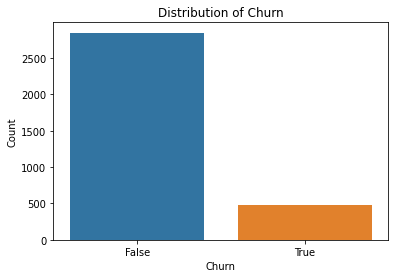

In [51]:
sns.countplot(data=df, x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

I will perform a multivariate analysis that involves analyzing the relationship between multiple variables. I will explore the relationship between multiple features and the target variable (customer churn) to understand how they are related.

I will filter the dataset to include only numeric columns before calculating the correlation matrix. 

In [52]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

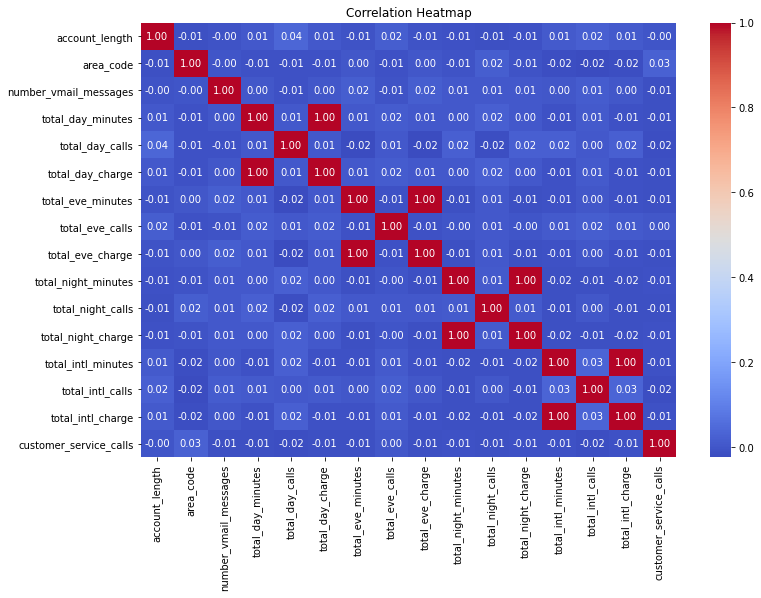

In [53]:
# Calculating the correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

I have identified that total interational charge has a perfect correlation with total international minutes, hence it indicates multicollinearity.

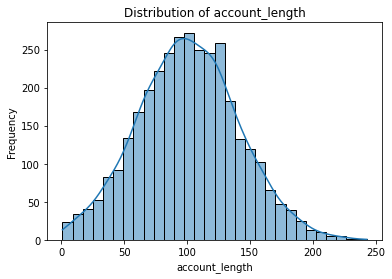

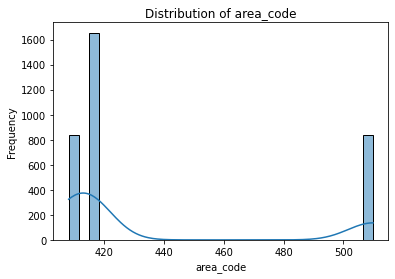

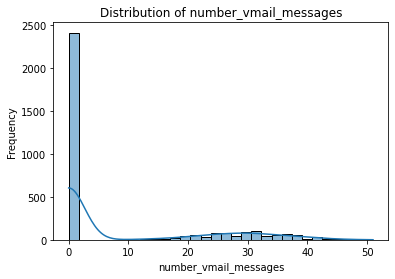

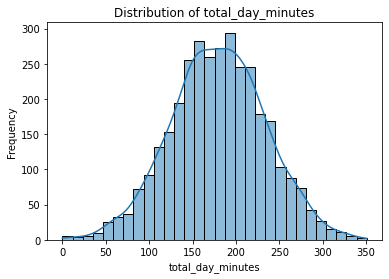

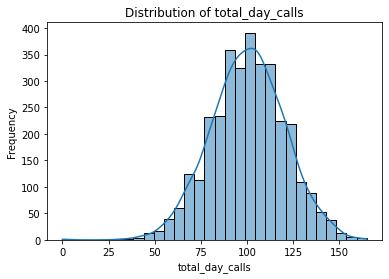

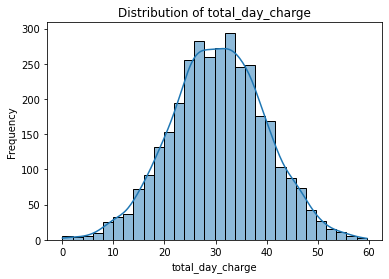

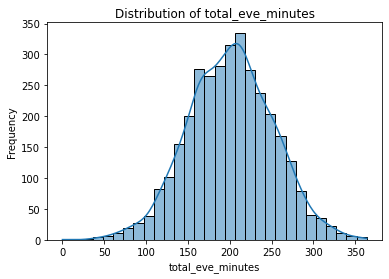

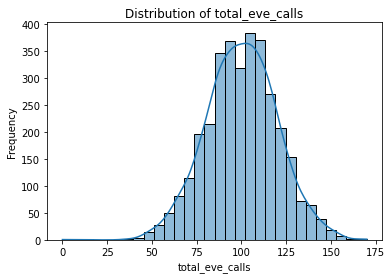

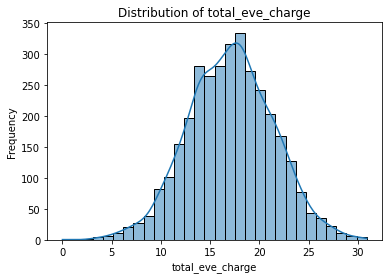

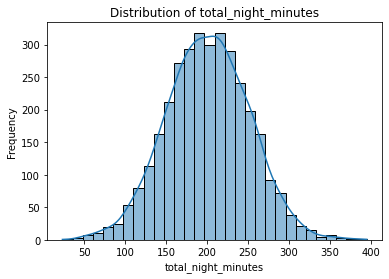

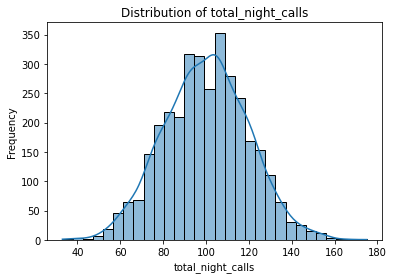

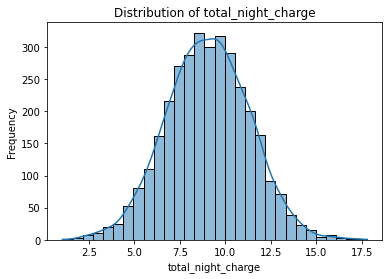

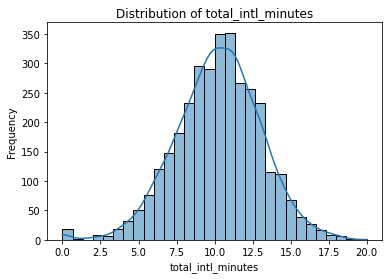

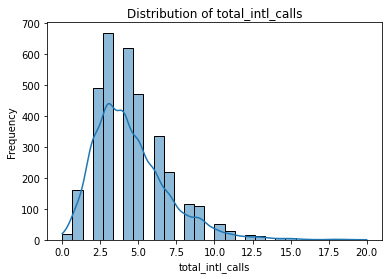

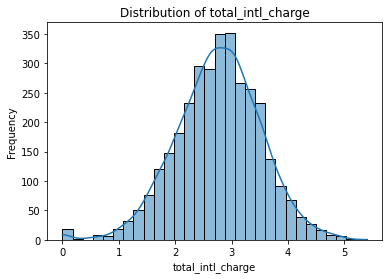

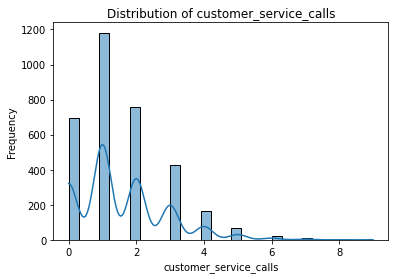

In [54]:
# Visualize distributions of numeric features.
for column in numeric_df.columns:
    plt.figure()
    sns.histplot(numeric_df[column], kde=True, bins=30)
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Basic Data Preprocessing.

This section, the data ought to be processed and prepare it for modelling. The dataset has categorical and numeric data columns, some need to be transformed into a suitable datatype acceptable by the different machine learning models. 

In [55]:
# convert churn column values into interger 1's and 0's
df['churn'] = df['churn'].astype(int)

In [56]:
# Convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area_code', 'international_plan', 'voice_mail_plan'])

In [57]:
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,0,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,0,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,0,0,1,0,0,1,1,0


In [58]:
# Separate features from the target variable

y = df['churn']
X = df.drop('churn', axis=1)

In [59]:
# Conducting a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression.

In [60]:
# Logistic regression will model the relationship between the features and the likelihood of a customer churning.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ])

#Then initializing the logistic regression model
logreg_model = LogisticRegression()

# Creating a pipeline that includes preprocessing and the logistic regression model
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', logreg_model)
])

In [61]:
# Fit model on training data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'area_code_408', 'area_code_415', 'area_code_510',
       'international_plan_no', 'international_plan_yes', 'voice_mail_plan_no',
       'voice_mail_plan_yes'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [62]:
# Predict churn for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

In [63]:
# Calculate the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [64]:
# Print the train and test scores
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix for test data
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.86
Test Accuracy: 0.86
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Confusion Matrix (Test Data):
[[554  12]
 [ 83  18]]


Accuracy of the model is 86%   Train Accuracy: 0.86  Test Accuracy 0.86

Classification Report:  
- Precision: The precision for class 0 (not churned) is 87%. The precision for class 1 (churned) is 60%
- Recall: The recall for class 0 (not churned) is 98% but the recall for class 1 (churned) is only 18%.
- F1-score: The F1-score for class 0 (not churned) is 92% and for class 1 (churned) is only 27%. The F1-score for class 1 is low due to the low recall.

In [65]:
# To visualize the results further, I will plot a ROC curve and AUC curve.

y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

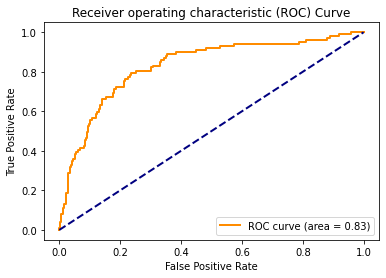

In [67]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve & The AUC.  
They provide a measure of how well the model can distinguish between positive and negative samples. A model with an AUC of 1 is perfect, while an AUC of 0.5 indicates that the model is no better than random guessing.
- AUC = 0.5: The model's performance is equivalent to random guessing, and it is not useful for classification.
- AUC > 0.5: The model performs better than random guessing, and the higher the AUC, the better the model's discriminatory power.
- AUC = 1: The model perfectly distinguishes between positive and negative samples, making it an excellent classifier.

AUC is 0.83, which is greater than 0.5 and closer to 1. An AUC of 0.83 suggests that the model has a good ability to rank the predictions, and it performs significantly better than random guessing.

In [68]:
# Plotting confusion matrix

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.classes_)

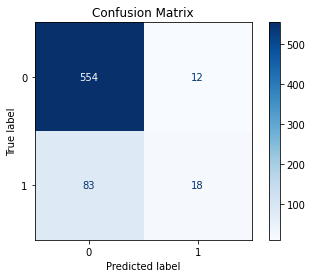

In [69]:
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
- The matrix shows a total of 667 samples in the test set.
- True Positives (TP): Model correclt predicted 18 samples as Not churned (class 0).
- True Negatives (TN): Model correctly predicted 554 samples as churned (class 1).
- False Positives (FP): Model incorrectly predicted 12 samples as churned when they were not churned.
- False Negatives (FN): Model incorrectly predicted 83 samples as not churned when they were actually churned.

Decision Tree Classifier

In [93]:
# Feed the model with both X_train and y_train

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Initialize the Decision Tree Classifier model
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the original training data
clf.fit(X_train, y_train)

# Making prediction on the test data
y_pred = clf.predict(X_test)


In [76]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [109]:
print("Decision Tree Classifier trained successfully.")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:",report)

Decision Tree Classifier trained successfully.
Accuracy: 0.916
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.95      0.95       566
           1       0.72      0.75      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667



The decision tree classifier was successfully trained after cleaning the data, achieving an accuracy of 91.7%.

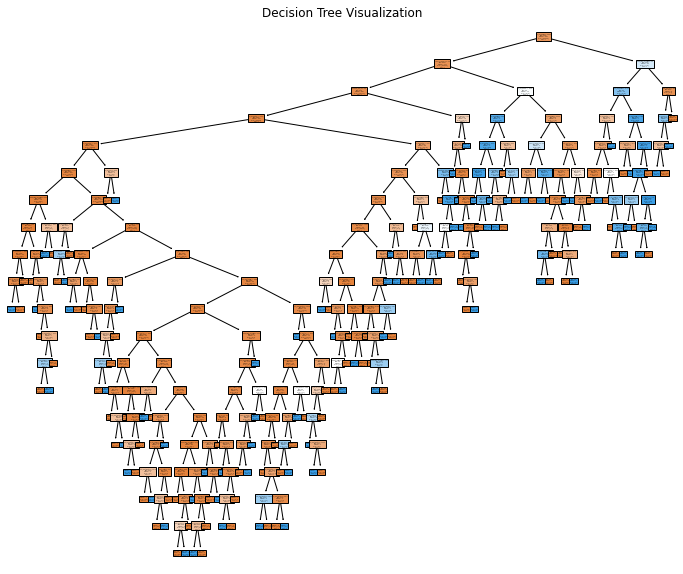

In [104]:
# Plotting the Decision Tree

plt.figure(figsize=(12, 10))
#plot_tree(clf, feature_names=df.columns, class_names=df['churn'].unique(), filled=True)
plot_tree(clf, feature_names=df.columns, class_names=[str(name) for name in column], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [102]:
# Predicted probabilities for the positive class
probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

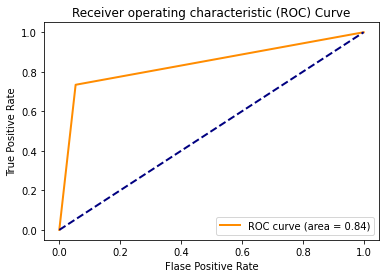

In [103]:
# Plotting ROC curve and AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curves for Logistic regression and Decision Tree were analyzed. The Decision Tree model outperformed the Logistic regression model in terms of AUC-ROC score, making it the most effective model for the given task.

Based on the provided metrics, the Decision Trees Classifier achieved the highest accuracy of 92% and F1 score 95%. The Logistic regression model achieved an accuracy of 86% and F1 score of 92%.  
Therefore, the Decision Trees Classifier is the best model for this task.

Conclusions & Recommendations.

In conclusion, the analysis suggests that we can accurately predict customer churn using a machine learning model, with the Decision Tree classisfier being the best recommended model due to its strong overall performance.

1. I would recommend that Syriatel makes use of the Decision Tree classifier as the primary model for predicting customer churn. This model has shown to be the most accurate in predicting churn, with an accuracy of 92%. The model has a higher ROC curve and strong overall performance in terms of accuracy.
2. I would recommend that Syriatel comes up with strategies to reduce customer service calls. This increases the number of customers who are likely to churn. This can be done by identifying the most important features.